<a href="https://colab.research.google.com/github/agolbeny/Alert-app-1/blob/main/modelcreation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
#Load the dataset
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

x_test.shape

170498071/170498071 [==============================] - 4s 0us/step


(10000, 32, 32, 3)

In [7]:
print(x_train.shape)

(50000, 32, 32, 3)


In [8]:
print(y_train.shape)

(50000, 1)


In [9]:
print(x_test.shape)

(10000, 32, 32, 3)


In [10]:
print(y_test.shape)

(10000, 1)


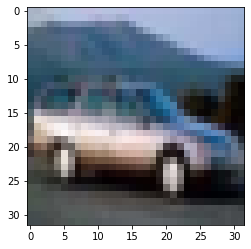

In [11]:
plt.imshow(x_train[4])

In [12]:
from keras.utils import to_categorical
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)
print(train_labels.shape)

(50000, 10)


In [13]:
print(test_labels.shape)

(10000, 10)


In [14]:
# Develop our own Convnet
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add( layers.Conv2D( 16, ( 3, 3 ), activation = 'sigmoid', input_shape = x_train[0, :, :, :].shape))
model.add( layers.Conv2D( 4, ( 3, 3 ), activation = 'sigmoid' ) )
model.add( layers.Flatten() )
model.add( layers.Dense( 10, activation = 'softmax' ) )


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 4)         580       
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 10)                31370     
                                                                 
Total params: 32,398
Trainable params: 32,398
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, train_labels, epochs = 5, batch_size = 128, validation_data = (x_test, test_labels))


Epoch 1/5
391/391 [==============================] - 50s 126ms/step - loss: 1.8661 - accuracy: 0.3173 - val_loss: 1.6041 - val_accuracy: 0.4227
Epoch 2/5
391/391 [==============================] - 49s 126ms/step - loss: 1.5485 - accuracy: 0.4498 - val_loss: 1.5025 - val_accuracy: 0.4653
Epoch 3/5
391/391 [==============================] - 49s 124ms/step - loss: 1.4701 - accuracy: 0.4775 - val_loss: 1.4474 - val_accuracy: 0.4858
Epoch 4/5
391/391 [==============================] - 49s 125ms/step - loss: 1.4045 - accuracy: 0.5013 - val_loss: 1.3959 - val_accuracy: 0.4982
Epoch 5/5
391/391 [==============================] - 49s 126ms/step - loss: 1.3636 - accuracy: 0.5178 - val_loss: 1.3733 - val_accuracy: 0.5043


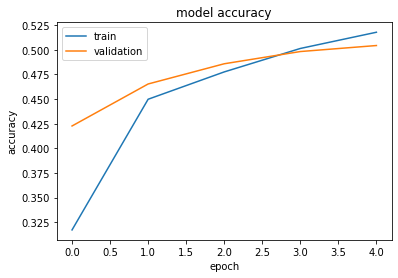

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [19]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [20]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [21]:
x_test_vgg_output = conv_base.predict(x_test, verbose = 1)
x_train_vgg_output = conv_base.predict(x_train, verbose = 1)

1563/1563 [==============================] - 509s 325ms/step


In [22]:
print(x_test_vgg_output.shape)
print(x_train_vgg_output.shape)

(10000, 1, 1, 512)
(50000, 1, 1, 512)


In [23]:
import numpy as np
x_test_new = np.reshape(x_test_vgg_output, (10000, 1 * 1 * 512))
x_train_new = np.reshape(x_train_vgg_output, (50000, 1 * 1 * 512))


In [24]:
print(x_test_new.shape)
print(x_train_new.shape)

(10000, 512)
(50000, 512)


In [28]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

new_model = models.Sequential()
new_model.add(layers.Dense(256, activation='relu', input_dim = 1 * 1 * 512))
new_model.add(layers.Dropout(0.5))
new_model.add(layers.Dense(10, activation = 'softmax'))

new_model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = new_model.fit(x_train_new, train_labels, epochs=32, batch_size=128, validation_data=(x_test_new, test_labels))


Epoch 1/32
391/391 [==============================] - 3s 7ms/step - loss: 3.4080 - accuracy: 0.3740 - val_loss: 1.4402 - val_accuracy: 0.5124
Epoch 2/32
391/391 [==============================] - 3s 7ms/step - loss: 1.5839 - accuracy: 0.4807 - val_loss: 1.3550 - val_accuracy: 0.5591
Epoch 3/32
391/391 [==============================] - 3s 7ms/step - loss: 1.4676 - accuracy: 0.5209 - val_loss: 1.3136 - val_accuracy: 0.5786
Epoch 4/32
391/391 [==============================] - 3s 7ms/step - loss: 1.3999 - accuracy: 0.5423 - val_loss: 1.3136 - val_accuracy: 0.5861
Epoch 5/32
391/391 [==============================] - 3s 7ms/step - loss: 1.3586 - accuracy: 0.5581 - val_loss: 1.2990 - val_accuracy: 0.5946
Epoch 6/32
391/391 [==============================] - 2s 6ms/step - loss: 1.3304 - accuracy: 0.5675 - val_loss: 1.3065 - val_accuracy: 0.5928
Epoch 7/32
391/391 [==============================] - 3s 7ms/step - loss: 1.3035 - accuracy: 0.5755 - val_loss: 1.3102 - val_accuracy: 0.6064
Epoch 

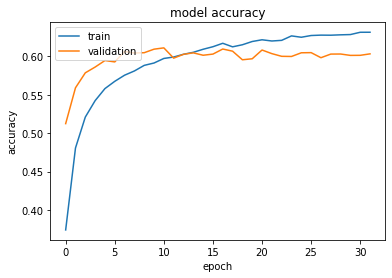

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()